## Kontur Algılama

- Kontur tespiti, aynı renk veya yoğunluğa sahip tüm kesintisiz noktaları(sınırla birlikte) birleştirmeyi amaçlayan yöntemdir
- Kontur şekil analizi, nesne algılama ve tanıma için kullanılır

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 450.5, 281.5, -0.5))

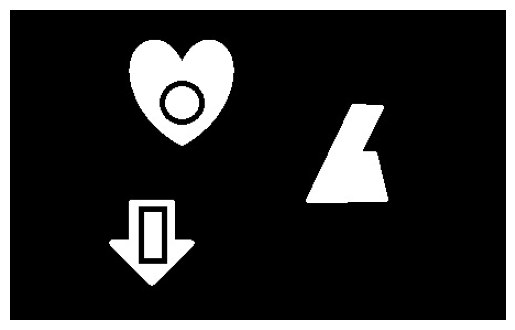

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# resmi içe aktar
img = cv2.imread("contour.jpg",0)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off")

In [13]:
# konturları bul
#RETR_CCOMP : Tüm konturları bulur. Aynı düzeydeki konturlar aynı renkte, farklı düzeydeki konturlar farklı renkte çizilir.
#CHAIN_APPROX_SIMPLE : Kontur noktalarının sadece başlangıç ve bitiş noktalarını tutar.
contours, hierarch = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
#contours : Bulunan konturların listesi
#hieararch : Kontur ağacı bilgileri

#external ve internal konturları ayırma
external_contour = np.zeros(img.shape)
internal_contour = np.zeros(img.shape)

for i in range(len(contours)):
    #external konturlar için hierarch[0][i][3] == -1 olmalı
    if hierarch[0][i][3] == -1:
        cv2.drawContours(external_contour, contours, i, 255, -1) # -1 : içi doldurulur
    else: #internal
        cv2.drawContours(internal_contour, contours, i, 255, -1)

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 450.5, 281.5, -0.5))

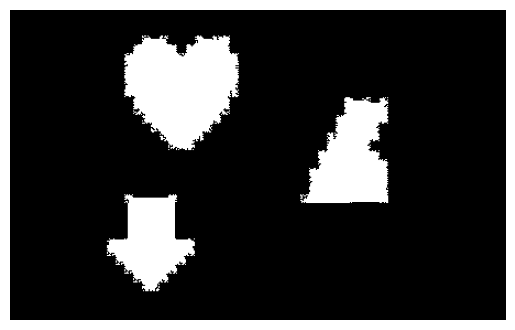

In [14]:
# extrenal konturları göster
plt.figure(), plt.imshow(external_contour, cmap = "gray"),plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 450.5, 281.5, -0.5))

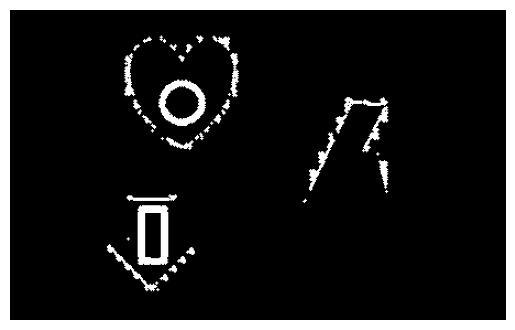

In [15]:
# internal konturları göster
plt.figure(), plt.imshow(internal_contour, cmap = "gray"),plt.axis("off")

(-0.5, 450.5, 281.5, -0.5)

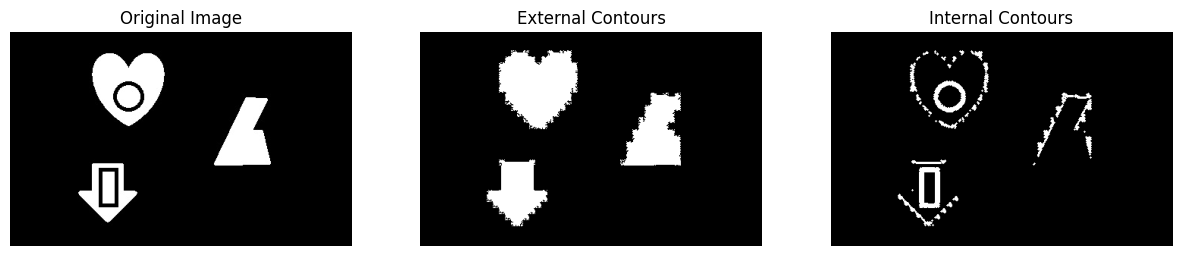

In [16]:
# Karşılaştırma
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img, cmap = "gray") 
ax1.set_title("Original Image")
ax1.axis("off")

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(external_contour, cmap = "gray")
ax2.set_title("External Contours")
ax2.axis("off")

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(internal_contour, cmap = "gray")
ax3.set_title("Internal Contours")
ax3.axis("off")